<img src="Auswahl_2016-01-11_002.png">

<pre style="text-align: right">
Gruppe:             
                MeSi
Autoren:            
Jens Meiners
Arne Siebenmorgen
</pre>

<img src="Auswahl_2016-01-11_003.png">

<img src="Auswahl_2016-01-11_013.png">

From this note, we see that in the primal, we need to minimize $w$. In the dual, maximization of $\lambda_\alpha$ is needed. We get this parameter by building the Langrangian of the primal.

$$L = \frac{1}{2} |w|^2 + \frac{C}{p} \sum_{\alpha=1}^{p} \varphi_\alpha - \sum_{\alpha=1}^{p}\lambda_\alpha \{y_{\top}^{(\alpha)}f_\alpha-1+\varphi_\alpha\} - \sum_{\alpha=1}^{p} \mu_\alpha \varphi_\alpha$$

with $f = w^\top x^{(\alpha)} + b$

Minimization w.r.t. $w$<br>
$$\frac{\partial L}{\partial w_l} = w - \lambda_\alpha y_{\top}^{(\alpha)}x^{(\alpha)} \stackrel{!}{=} 0$$
$$w = \lambda_\alpha y_{\top}^{(\alpha)}x^{(\alpha)}$$

Minimization w.r.t. $b$ yields the first constraint<br>
$$\frac{\partial L}{\partial b} =- \sum_{\alpha=1}^{p}\lambda_\alpha y_{\top}^{(\alpha)}\stackrel{!}{=} 0$$

Minimization w.r.t. $\varphi$ yields the second constraint<br>
$$\frac{\partial L}{\partial \varphi_\alpha} = \frac{C}{p} - \lambda_\alpha - \mu_\alpha \stackrel{!}{=} 0$$
$$\Rightarrow 0 \leq \lambda_\alpha \leq \frac{C}{p}$$

Plugging the results back into the Lagrangian results in

$$-\frac{1}{2}\sum_{\alpha=1}^{p}\sum_{\beta=1}^{p} \lambda_\alpha\lambda_\beta y_{\top}^{(\alpha)}y_{\top}^{(\beta)}(x^{(\alpha)})^\top x^{(\beta)}\ +  \sum_{\alpha=1}^{p}\lambda_\alpha + \frac{C}{p} \sum_{\alpha=1}^{p} \varphi_\alpha - \sum_{\alpha=1}^{p} \mu_\alpha \varphi_\alpha$$

Its optimal solution depends on $\lambda$ because we solved the dual problem. The Problem therfore reduces to:

$$\max_{\lambda_\alpha} \{-\frac{1}{2}\sum_{\alpha=1}^{p}\sum_{\beta=1}^{p} \lambda_\alpha\lambda_\beta y_{\top}^{(\alpha)}y_{\top}^{(\beta)}(x^{(\alpha)})^\top x^{(\beta)}\ +  \sum_{\alpha=1}^{p}\lambda_\alpha\}$$

Which is the result we searched for.

<img src="Auswahl_2016-01-11_004.png">

<img src="Auswahl_2016-01-11_005.png">

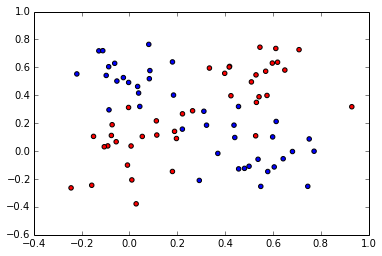

In [197]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
%matplotlib inline
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'blue': [(0, 0.7, 0.7), (1, 1, 1)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'red': [(0, 1, 1), (1, 0.7, 0.7)]})
plt.cm.register_cmap(cmap=cmap)

# generate training data
cov = [[0.1, 0], [0, 0.1]]

mean1 = [0. , 1.]
mean2 = [1. , 0.]
mean3 = [0. , 0.]
mean4 = [1. , 1.]

p1 = 0.5*(np.vstack((np.random.multivariate_normal(mean1, cov, 20), np.random.multivariate_normal(mean2, cov, 20))))
p2 = 0.5*(np.vstack((np.random.multivariate_normal(mean3, cov, 20), np.random.multivariate_normal(mean4, cov, 20))))

plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')
plt.show()

p1 = np.append(p1,np.ones((40,1)), axis=1)
p2 = np.append(p2,np.zeros((40,1)), axis=1)

train = np.append(p1,p2, axis =0)
np.random.shuffle(train)

p3 = 0.5*(np.vstack((np.random.multivariate_normal(mean1, cov, 20), np.random.multivariate_normal(mean2, cov, 20))))
p4 = 0.5*(np.vstack((np.random.multivariate_normal(mean3, cov, 20), np.random.multivariate_normal(mean4, cov, 20))))
p3 = np.append(p3,np.ones((40,1)), axis=1)
p4 = np.append(p4,np.zeros((40,1)), axis=1)

test = np.append(p3,p4, axis =0)
np.random.shuffle(test)

In [198]:
comp = np.vstack((test,train))

In [230]:
import pickle
pickle.dump(test, open("test.p", "wb"))
pickle.dump(train, open("train.p", "wb"))
pickle.dump(comp, open("comp.p", "wb"))
pickle.dump(p1, open("p1.p", "wb"))
pickle.dump(p2, open("p2.p", "wb"))
pickle.dump(p3, open("p3.p", "wb"))
pickle.dump(p4, open("p4.p", "wb"))

In [199]:
# further imports
from sklearn.svm import SVC

In [200]:
# train a C-SVM with standart parameters
clf = SVC()
clf.fit(train[:,0:2], train[:,2]) 
# Note that the RBF Kernel is the default:

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<img src="Auswahl_2016-01-11_006.png">

In [201]:
e = (clf.predict(test[:,0:2]) == test[:,2]).sum() 
print 'number of correct classifications:',e
e = e / 80.0
print 'percentage of correct classifications:',e

number of correct classifications: 60
percentage of correct classifications: 0.75


<img src="Auswahl_2016-01-11_007.png">

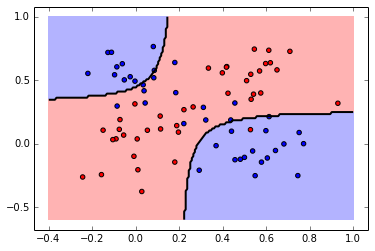

In [202]:
plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')

plt.show()

<img src="Auswahl_2016-01-11_008.png">

In [203]:
exp = np.arange(-5,16,1)
print exp
C = np.power(2.0,exp)
print 'C',C
exp = np.arange(-15,4,1)
print exp
gamma = np.power(2.0,exp)
print 'gamma',gamma

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
C [  3.12500000e-02   6.25000000e-02   1.25000000e-01   2.50000000e-01
   5.00000000e-01   1.00000000e+00   2.00000000e+00   4.00000000e+00
   8.00000000e+00   1.60000000e+01   3.20000000e+01   6.40000000e+01
   1.28000000e+02   2.56000000e+02   5.12000000e+02   1.02400000e+03
   2.04800000e+03   4.09600000e+03   8.19200000e+03   1.63840000e+04
   3.27680000e+04]
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3]
gamma [  3.05175781e-05   6.10351562e-05   1.22070312e-04   2.44140625e-04
   4.88281250e-04   9.76562500e-04   1.95312500e-03   3.90625000e-03
   7.81250000e-03   1.56250000e-02   3.12500000e-02   6.25000000e-02
   1.25000000e-01   2.50000000e-01   5.00000000e-01   1.00000000e+00
   2.00000000e+00   4.00000000e+00   8.00000000e+00]


<img src="Auswahl_2016-01-11_009.png">

In [204]:
from sklearn import cross_validation
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

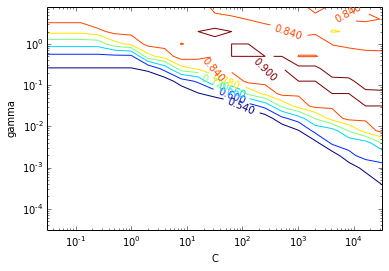

In [205]:
X, Y = np.meshgrid(C,gamma)
acc = np.zeros(X.shape)
for i, c in enumerate(C):
    for j, g in enumerate(gamma):
        clf = SVC(C=c,gamma=g)
        scores = cross_validation.cross_val_score(clf, train[:,0:2], train[:,2], cv=4)
        #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        acc[j,i] = scores.mean()
plt.xscale('log')
plt.yscale('log')
CS = plt.contour(X,Y, acc)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('C')
plt.ylabel('gamma')
plt.show()

<img src="Auswahl_2016-01-11_010.png">

In [206]:
exp = np.arange(-5,40,1)
print exp
C = np.power(2.0,exp)
exp = np.arange(-15,10,1)
print exp
gamma = np.power(2.0,exp)

[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9]


/home/jens/Programme/anaconda/lib/python2.7/site-packages/matplotlib/contour.py:376: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


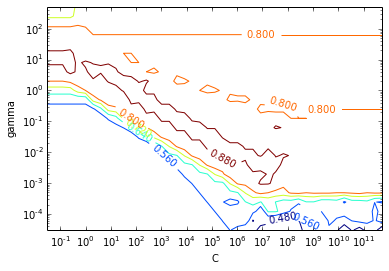

In [207]:
X, Y = np.meshgrid(C,gamma)
acc = np.zeros(X.shape)
for i, c in enumerate(C):
    for j, g in enumerate(gamma):
        clf = SVC(C=c,gamma=g)
        scores = cross_validation.cross_val_score(clf, train[:,0:2], train[:,2], cv=4)
        #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        acc[j,i] = scores.mean()
plt.xscale('log')
plt.yscale('log')
CS = plt.contour(X,Y, acc)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('C')
plt.ylabel('gamma')
plt.show()

In [208]:
exp = np.arange(2,7,0.2)
C = np.power(2.0,exp)
exp = np.arange(-1,4,0.2)
gamma = np.power(2.0,exp)

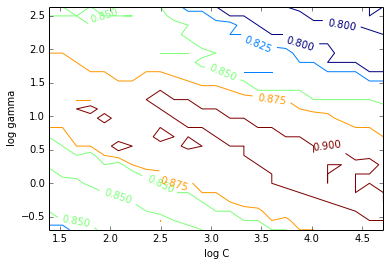

In [209]:
X, Y = np.meshgrid(C,gamma)
acc = np.zeros(X.shape)
for i, c in enumerate(C):
    for j, g in enumerate(gamma):
        clf = SVC(C=c,gamma=g)
        scores = cross_validation.cross_val_score(clf, train[:,0:2], train[:,2], cv=4)
        #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        acc[j,i] = scores.mean()
CS = plt.contour(np.log(X),np.log(Y), acc)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('log C')
plt.ylabel('log gamma')
plt.show()

In [218]:
exp = np.arange(2.5,4.5,0.02)
C = np.power(2.0,exp)
exp = np.arange(-0.5,1,0.02)
gamma = np.power(2.0,exp)

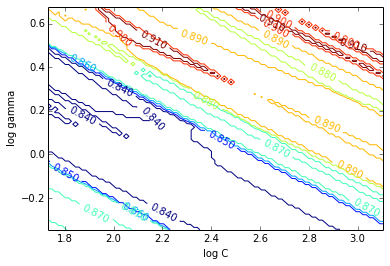

In [219]:
X, Y = np.meshgrid(C,gamma)
acc = np.zeros(X.shape)
for i, c in enumerate(C):
    for j, g in enumerate(gamma):
        clf = SVC(C=c,gamma=g)
        scores = cross_validation.cross_val_score(clf, train[:,0:2], train[:,2], cv=4)
        #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        acc[j,i] = scores.mean()
CS = plt.contour(np.log(X),np.log(Y), acc)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('log C')
plt.ylabel('log gamma')
plt.show()

$\gamma = 0.58$ $C = 2.05$

In [220]:
# train a C-SVM with optimal parameters
clf = SVC(C=2.05,gamma=0.58)
clf.fit(train[:,0:2], train[:,2]) 

SVC(C=2.05, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.58, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

<img src="Auswahl_2016-01-11_011.png">

In [221]:
e = (clf.predict(test[:,0:2]) == test[:,2]).sum() 
print 'number of correct classifications:',e
e = e / 80.0
print 'percentage of correct classifications:',e

number of correct classifications: 70
percentage of correct classifications: 0.875


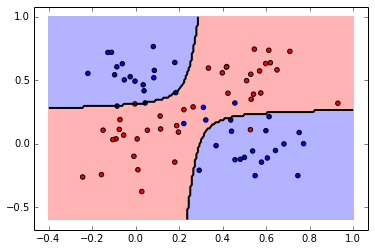

In [222]:
plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')

plt.show()

<img src="Auswahl_2016-01-11_012.png">

In [223]:
# train a C-SVM with standart parameters
clfstd = SVC()
clfstd.fit(train[:,0:2], train[:,2]) 
# train a C-SVM with optimal parameters
clfopt = SVC(C=2.05,gamma=0.58)
clfopt.fit(train[:,0:2], train[:,2]) 
pass

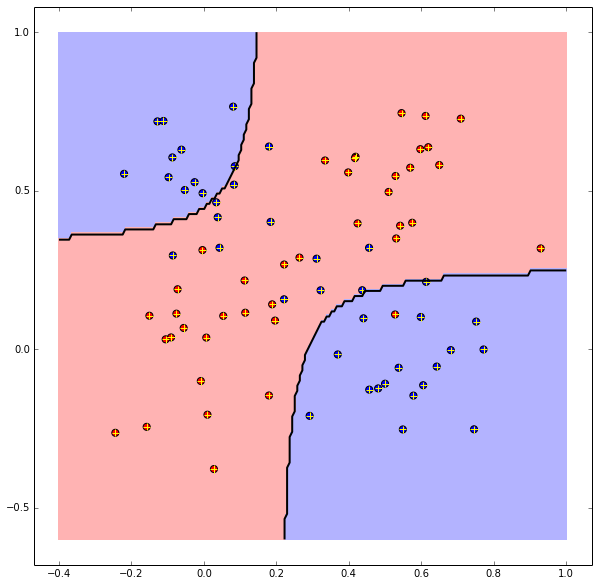

using standart parameters
number of correct classifications: 60
percentage of correct classifications: 0.75
number of support vectors (red,blue) [40 40]
Accuracy: 0.79 (+/- 0.20)


In [225]:
plt.figure(figsize=(10,10))
plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = clfstd.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.scatter(p1[:,0], p1[:,1], c='blue',s=50)
plt.scatter(p2[:,0], p2[:,1], c='red',s=50)
sv = clfstd.support_vectors_
plt.scatter(sv[:,0],sv[:,1], c='yellow',marker='+',s=50)

plt.show()

print 'using standart parameters'
e = (clfstd.predict(test[:,0:2]) == test[:,2]).sum() 
print 'number of correct classifications:',e
e = e / 80.0
print 'percentage of correct classifications:',e
print 'number of support vectors (red,blue)',clfstd.n_support_

scores = cross_validation.cross_val_score(clfstd, comp[:,0:2], comp[:,2], cv=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

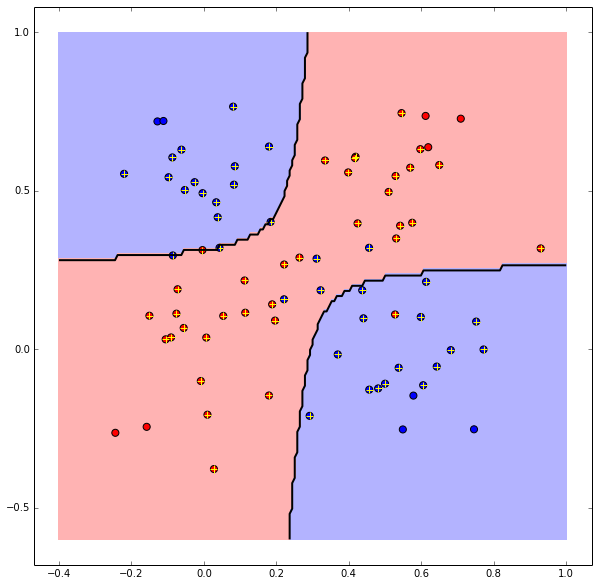

using optimized parameters
number of correct classifications: 70
percentage of correct classifications: 0.875
number of support vectors (red,blue) [35 35]
Accuracy: 0.88 (+/- 0.04)


In [226]:
plt.figure(figsize=(10,10))
plt.scatter(p1[:,0], p1[:,1], c='blue')
plt.scatter(p2[:,0], p2[:,1], c='red')

# class 0 and 1 : areas
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
Z = clfopt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
               norm=colors.Normalize(0., 1.))
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

plt.scatter(p1[:,0], p1[:,1], c='blue',s=50)
plt.scatter(p2[:,0], p2[:,1], c='red',s=50)
sv = clfopt.support_vectors_
plt.scatter(sv[:,0],sv[:,1], c='yellow',marker='+',s=50)

plt.show()

print 'using optimized parameters'
e = (clfopt.predict(test[:,0:2]) == test[:,2]).sum() 
print 'number of correct classifications:',e
e = e / 80.0
print 'percentage of correct classifications:',e
print 'number of support vectors (red,blue)',clfopt.n_support_
scores = cross_validation.cross_val_score(clfopt, comp[:,0:2], comp[:,2], cv=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

For the standart parameters, the descision boundry implies that we may underfit the problem because there are some examples from the red class that are not correctly classified, but seem to resemble the centroid of their cluster.
On the other hand, the number of support vectors is extremely high, almost all examples are support vectors. The standart parameter-set seems to favor larger datasets where more support vectors are usually needed. In the optimized case, the number of support vectors decreased and classification accuracy increased. Still, the number of support vectors seems to be quite high, but since we did a grid search for the parameters, we can be confident that a smaller set of vectors would not increase accuracy any more.